<a href="https://colab.research.google.com/github/BossOfTheCode/ml/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

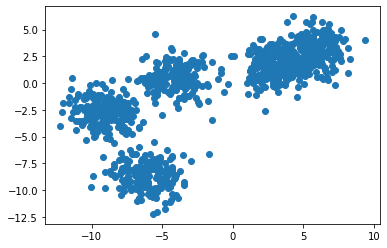

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [2]:
def kmeans(X, K, n_iter):
  output={}
  m=X.shape[0]
  n=X.shape[1]
  centroids=np.array([]).reshape(n,0)
  for i in range(K):
      rand=random.randint(0,m-1)
      centroids=np.c_[centroids,X[rand]] 
  for i in range(n_iter):
      distance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-centroids[:,k])**2,axis=1)
          distance=np.c_[distance,tempDist]
      C=np.argmin(distance,axis=1)+1
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          centroids[:,k]=np.mean(Y[k+1],axis=0)
      output=Y
  return output, centroids

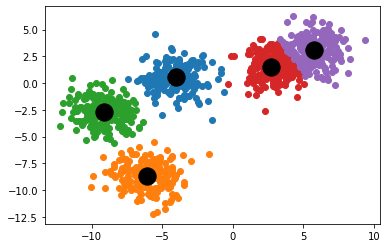

In [3]:
clusters, centroids = kmeans(X, 5, 100)
for k in range(5):
    plt.scatter(clusters[k+1][:,0],clusters[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='black')

In [4]:
SSE_array=np.array([])
for K in range(1,11):
    clusters, centroids=kmeans(X, K, 100)
    SSE=0
    for k in range(K):
        SSE+=np.sum((clusters[k+1]-centroids.T[k,:])**2)
    SSE_array=np.append(SSE_array,SSE)

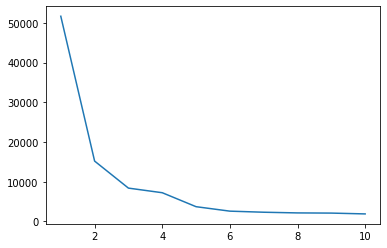

In [5]:
K_array=np.arange(1,11,1)
plt.plot(K_array,SSE_array)
plt.show()

# Задание 2

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/2.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0
